Epoch 1/11
352/352 [==============================] - 9s 25ms/step - loss: 2.0065 - accuracy: 0.2627 - val_loss: 1.8258 - val_accuracy: 0.3380
Epoch 2/11
352/352 [==============================] - 8s 24ms/step - loss: 1.8420 - accuracy: 0.3313 - val_loss: 1.7537 - val_accuracy: 0.3798
Epoch 3/11
352/352 [==============================] - 8s 23ms/step - loss: 1.7936 - accuracy: 0.3534 - val_loss: 1.7009 - val_accuracy: 0.3908
Epoch 4/11
352/352 [==============================] - 7s 21ms/step - loss: 1.7577 - accuracy: 0.3659 - val_loss: 1.7031 - val_accuracy: 0.3996
Epoch 5/11
352/352 [==============================] - 7s 20ms/step - loss: 1.7276 - accuracy: 0.3755 - val_loss: 1.6621 - val_accuracy: 0.4106
Epoch 6/11
352/352 [==============================] - 7s 21ms/step - loss: 1.7124 - accuracy: 0.3836 - val_loss: 1.6417 - val_accuracy: 0.4332
Epoch 7/11
352/352 [==============================] - 8s 22ms/step - loss: 1.6834 - accuracy: 0.3925 - val_loss: 1.6243 - val_accuracy: 0.4324

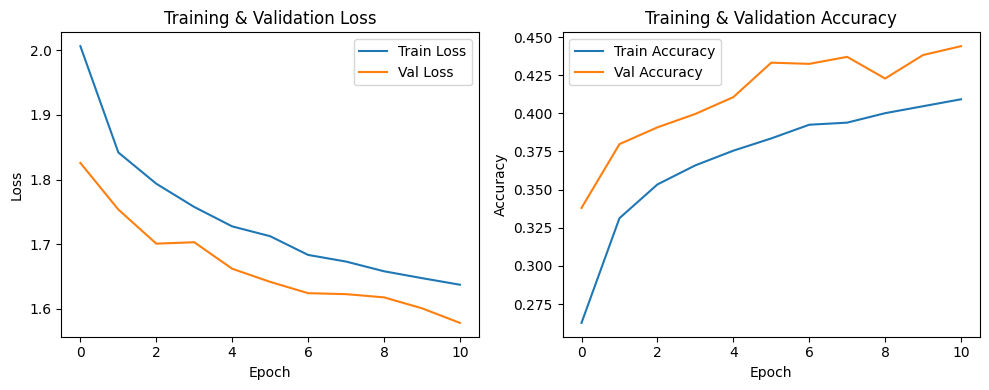

In [2]:
# a. Import necessary packages
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# b. Load the training and testing data
train = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

# Separate features and labels
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

X_test = test.drop('label', axis=1).values
y_test = test['label'].values

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# c. Define the network architecture using Keras
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(3072,)),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# d. Compile and train the model using Adam optimizer
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=11, batch_size=128, validation_split=0.1)

# e. Evaluate the network
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# f. Plot training loss and accuracy
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
